In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
####USER DEFINED VARIABLES####
prot_stab_path = '/Users/stephaniecrilly/Kortemme_lab/helix_sliding/20240304_ngs_data/30-993725825/rocklin_analysis/20240304_r1hs_rep1_ Trypsin_protein_w_design_type.csv' #trypsin data only
exp_path = '/Users/stephaniecrilly/Kortemme_lab/switch_seq/r1-hs-pilot_rep1_expression.csv'
kds_path = '/Users/stephaniecrilly/Kortemme_lab/switch_seq/Kds.csv'

outdir = '/Users/stephaniecrilly/Kortemme_lab/switch_seq/'
fig_outdir = '/Users/stephaniecrilly/Kortemme_lab/helix_sliding/figures'
####

In [113]:
#read in data
prot_stab_df = pd.read_csv(prot_stab_path).rename({'Name':'design'}, axis=1)
exp_df = pd.read_csv(exp_path).rename({'Name':'design'}, axis=1)
kds_df = pd.read_csv(kds_path).rename({'geno':'design'}, axis=1)

print(prot_stab_df.shape)
print(exp_df.shape)
print(kds_df.shape)

(97, 46)
(92, 13)
(97, 7)


In [114]:
#quality filtering of data
# prot_stab_df = prot_stab_df.query('ec50_95ci < 2.0', engine='python').copy()
#filter Kds on err and fit
#plotting all data for now

#inferred Kds outside of titration range binned to bounds of range


In [115]:
#merge dfs
prot_stab_kds_df = pd.merge(prot_stab_df, kds_df, on='design', how='right')
prot_stab_exp_df = pd.merge(prot_stab_df, exp_df, on='design', how='right')
kds_exp_df = pd.merge(kds_df, exp_df, on='design', how='right')
all_merge_df = pd.merge(prot_stab_kds_df, exp_df, on='design', how='right')

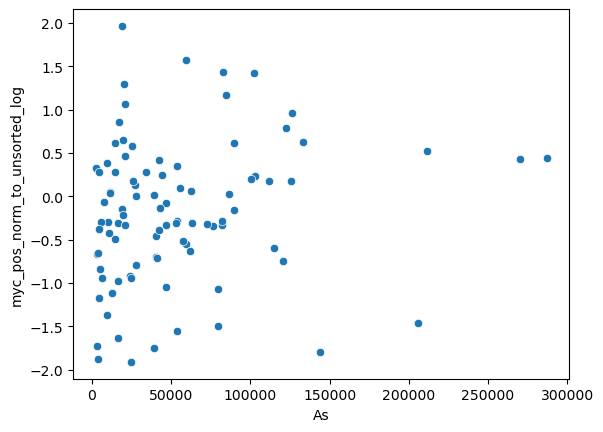

In [116]:
sns.scatterplot(data=kds_exp_df, x='As', y='myc_pos_norm_to_unsorted_log')
plt.show()

#add in correlation

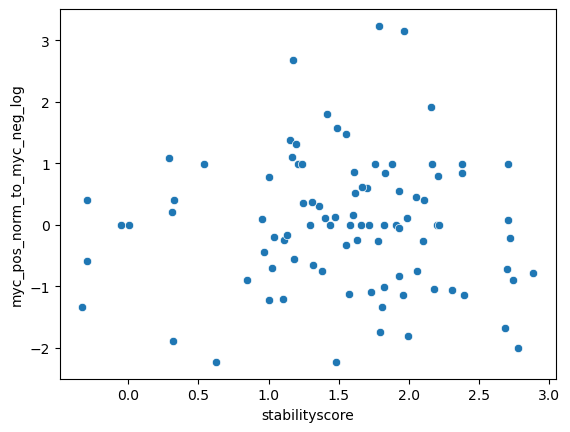

In [117]:
sns.scatterplot(data=prot_stab_exp_df, x='stabilityscore', y='myc_pos_norm_to_myc_neg_log')
plt.show()

#add in correlation

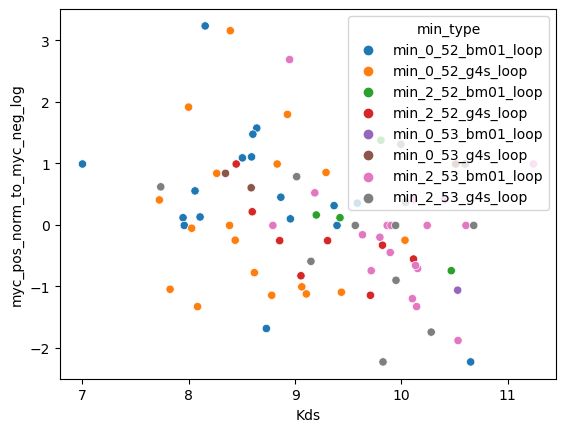

In [118]:
sns.scatterplot(data=all_merge_df, x='Kds', y='myc_pos_norm_to_myc_neg_log', hue='min_type')
plt.show()

#add in correlation

/opt/anaconda3/envs/plotting/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/plotting/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/plotting/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/plotting/lib/python3.10/site-packages/seabo

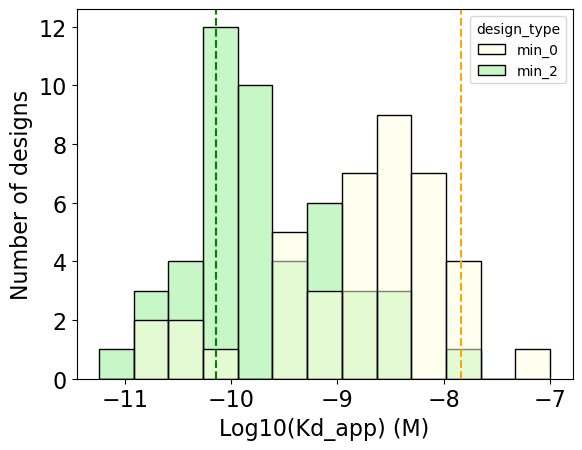

<Figure size 640x480 with 0 Axes>

In [119]:
#histogram of Kds by design group

designs_list = kds_df['design'].tolist()

min_type_list = []
for i in designs_list:
    if 'min_0' in i:
        min_type_list.append('min_0')
    elif 'min_2' in i:
        min_type_list.append('min_2')
    else:
        min_type_list.append('bm01_ctrl')

kds_df['design_type'] = min_type_list

sns.histplot(kds_df[kds_df['design_type'].isin(['min_0', 'min_2'])], x=-kds_df['Kds'], bins=13, hue='design_type', palette=['lightyellow', 'lightgreen']) #plot Kd as -log10 because easier to represent on histogram
plt.ylabel('Number of designs', fontsize=16)
plt.xlabel('Log10(Kd_app) (M)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#optional show positive and negative control
#comment or uncomment as desired
plt.axvline(x = -(kds_df.loc[kds_df['design'] == 'bm01_ALFA_t3', 'Kds'].item()), color = 'orange', linestyle='dashed', label = 'min0 ctrl')
plt.axvline(x = -(kds_df.loc[kds_df['design'] == 'bm01_ALFA_t6', 'Kds'].item()), color = 'green', linestyle='dashed', label = 'min2 ctrl')
#plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

plt.show()
#plt.savefig(f'{outdir}/kds_histplot.png', dpi=300, bbox_inches = 'tight')
plt.clf()

/opt/anaconda3/envs/plotting/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/plotting/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/plotting/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


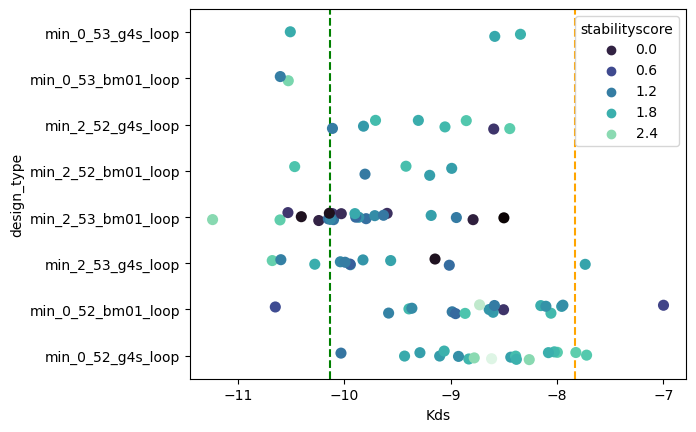

In [120]:
#plotting stripplot for each design type colored by stability score

#filter out controls before plotting
prot_stab_kds_df = prot_stab_kds_df[prot_stab_kds_df['design'].str.contains('bm01_ALFA')==False]
prot_stab_kds_df = prot_stab_kds_df[prot_stab_kds_df['design'].str.contains('myc')==False]

prot_stab_kds_df[['design_id', 'design_type']] = prot_stab_kds_df['design'].str.split(r'ALFA_\d\d_\d{1,2}_', expand=True)

# sns.histplot(prot_stab_kds_df, x='stabilityscore', hue='design_type')
# plt.show())
sns.stripplot(data=prot_stab_kds_df, x=-prot_stab_kds_df['Kds'], y='design_type', hue='stabilityscore', s=8, palette='mako')
plt.axvline(x = -(kds_df.loc[kds_df['design'] == 'bm01_ALFA_t3', 'Kds'].item()), color = 'orange', linestyle='dashed', label = 'min0 ctrl')
plt.axvline(x = -(kds_df.loc[kds_df['design'] == 'bm01_ALFA_t6', 'Kds'].item()), color = 'green', linestyle='dashed', label = 'min2 ctrl')
plt.show()